# Menambah Library

Memasukan library yang dibutuhkan dalam projek

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import winsound
import os

from tensorflow.python.client import device_lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime


# Cek Spek

Mengetahui apakah hanya dapat memakai CPU atau dapat menggunakan CPU dan GPU (Nvidia Cuda)

In [12]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4298249601470840805
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1473062299
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9721171948852118937
 physical_device_desc: "device: 0, name: NVIDIA GeForce MX350, pci bus id: 0000:01:00.0, compute capability: 6.1"
 xla_global_id: 416903419]

# AUGMENTASI GAMBAR

Generator untuk membuat gambar menjadi lebih variatif dan menentukan besar data yang digunakan untuk validasi

In [13]:
datagen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    validation_split = 0.3
)

datagen_val = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.3
)

# DATASET

Ubah data menjadi dataset training & validation

In [14]:
dataset = 'C:/Users/LENOVO/Documents/UAS PKB/27 Cat Breeds'

jumlah_batch = 64
ukuran_gambar = (300, 300)

train = datagen_train.flow_from_directory(
    dataset,
    target_size=ukuran_gambar,
    batch_size=jumlah_batch,
    class_mode='categorical',
    subset='training'
)

val = datagen_val.flow_from_directory(
    dataset,
    target_size=ukuran_gambar,
    batch_size=jumlah_batch,
    class_mode='categorical',
    subset='validation'
)

Found 2268 images belonging to 27 classes.
Found 971 images belonging to 27 classes.


# MODEL CNN

Membuat model dengan algoritma cnn untuk klasifikasi gambar multi kelas

In [15]:
jumlah_kelas = val.num_classes

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(ukuran_gambar[0], ukuran_gambar[1], 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)


predictions = Dense(jumlah_kelas, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# LATIH

Model yang sudah dibuat dilatih memakai dataset training Dan validation

In [16]:
berhenti_berharap = EarlyStopping(monitor='val_loss', patience=3)
            
latih = model.fit(
    train,
    validation_data=val,
    epochs=100,
    callbacks=[berhenti_berharap]
)

winsound.Beep(1500,5000)

Epoch 1/100
36/36 [==============================] - 765s 22s/step - loss: 3.3163 - accuracy: 0.0538 - val_loss: 3.0794 - val_accuracy: 0.2812
Epoch 2/100
36/36 [==============================] - 143s 4s/step - loss: 3.0290 - accuracy: 0.1415 - val_loss: 2.5713 - val_accuracy: 0.3018
Epoch 3/100
36/36 [==============================] - 143s 4s/step - loss: 2.5721 - accuracy: 0.2509 - val_loss: 2.0341 - val_accuracy: 0.4295
Epoch 4/100
36/36 [==============================] - 145s 4s/step - loss: 2.2087 - accuracy: 0.3100 - val_loss: 1.7562 - val_accuracy: 0.4789
Epoch 5/100
36/36 [==============================] - 143s 4s/step - loss: 2.0118 - accuracy: 0.3642 - val_loss: 1.5856 - val_accuracy: 0.5510
Epoch 6/100
36/36 [==============================] - 143s 4s/step - loss: 1.7765 - accuracy: 0.4396 - val_loss: 1.3709 - val_accuracy: 0.6004
Epoch 7/100
36/36 [==============================] - 144s 4s/step - loss: 1.6394 - accuracy: 0.4621 - val_loss: 1.2660 - val_accuracy: 0.6025
Epoch

Grafik riwayat pelatihan untuk melihat seberapa baik model dilatih

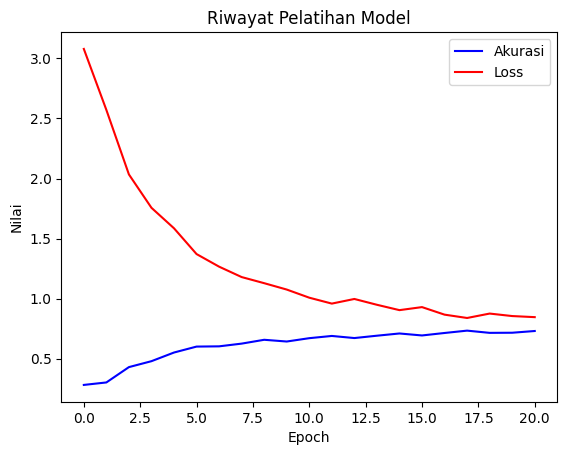

In [17]:
akurasi = latih.history['val_accuracy']
loss = latih.history['val_loss']

plt.plot(akurasi, color='blue', label='Akurasi')
plt.plot(loss, color='red', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Nilai')
plt.title('Riwayat Pelatihan Model')
plt.legend()
plt.show()

Cek akurasi akhir model

In [18]:
hasil = model.evaluate(val)

accuracy = hasil[1]
print(f'\nAkurasi Model: {accuracy * 100:.2f} %')

16/16 [==============================] - 43s 3s/step - loss: 0.8456 - accuracy: 0.7302

Akurasi Model: 73.02 %


# Evaluasi

Mencoba model dengan data nyata diluar dataset

1/1 [==============================] - 1s 1s/step


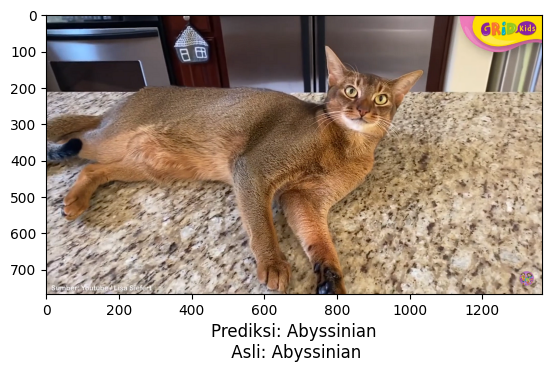

1/1 [==============================] - 0s 75ms/step


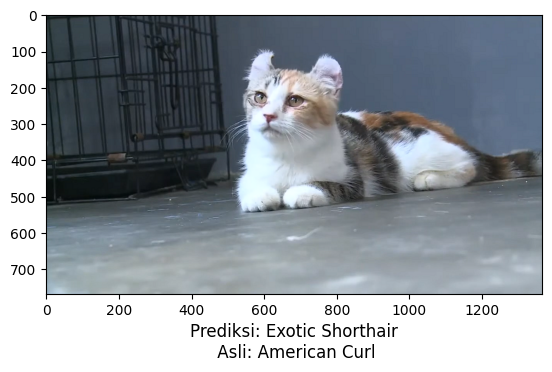

1/1 [==============================] - 0s 62ms/step


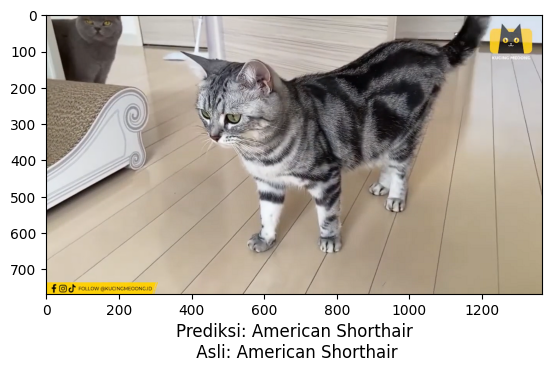

1/1 [==============================] - 0s 62ms/step


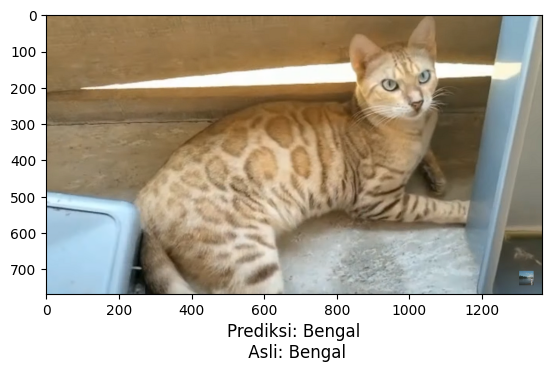

1/1 [==============================] - 0s 56ms/step


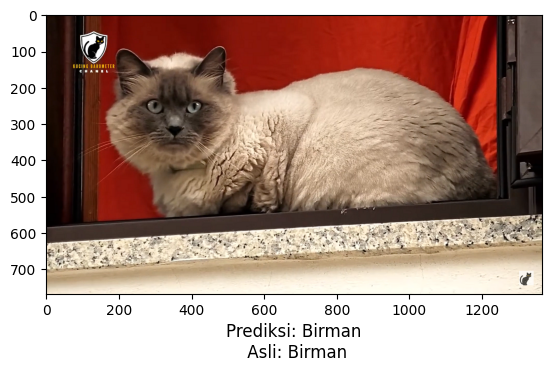

1/1 [==============================] - 0s 44ms/step


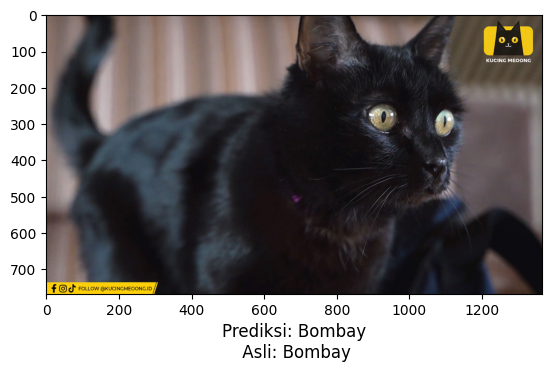

1/1 [==============================] - 0s 46ms/step


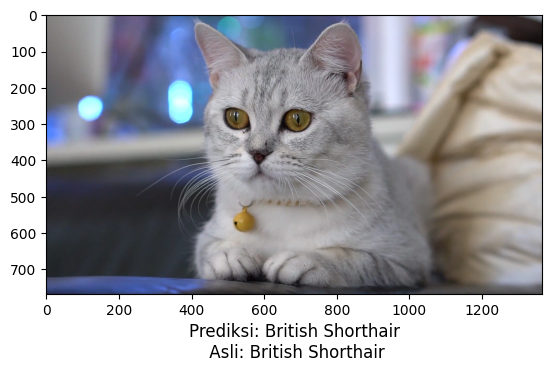

1/1 [==============================] - 0s 48ms/step


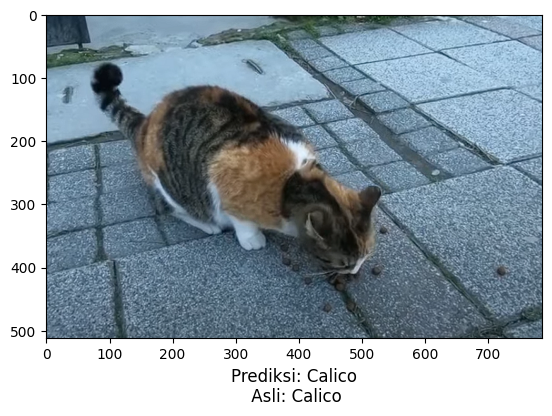

1/1 [==============================] - 0s 46ms/step


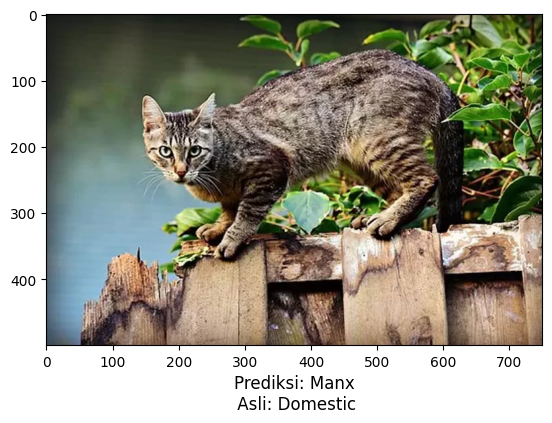

1/1 [==============================] - 0s 43ms/step


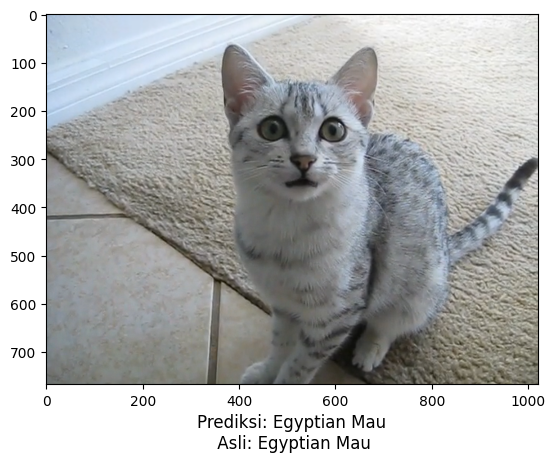

1/1 [==============================] - 0s 42ms/step


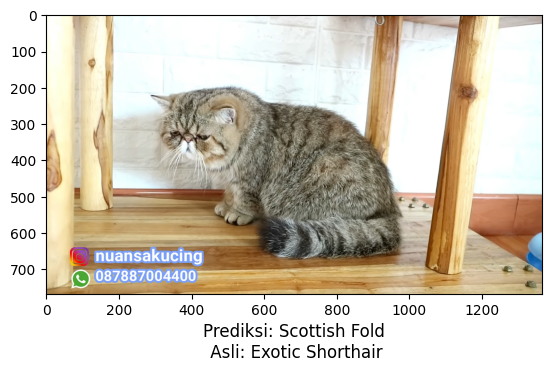

1/1 [==============================] - 0s 34ms/step


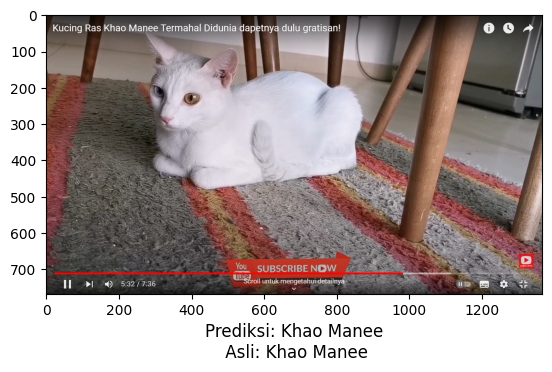

1/1 [==============================] - 0s 36ms/step


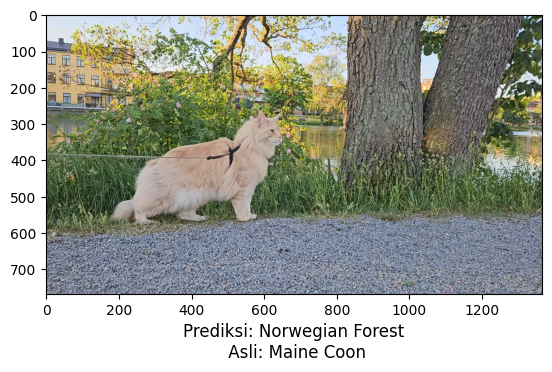

1/1 [==============================] - 0s 33ms/step


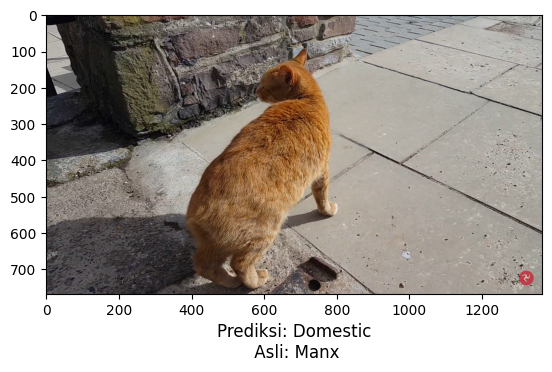

1/1 [==============================] - 0s 36ms/step


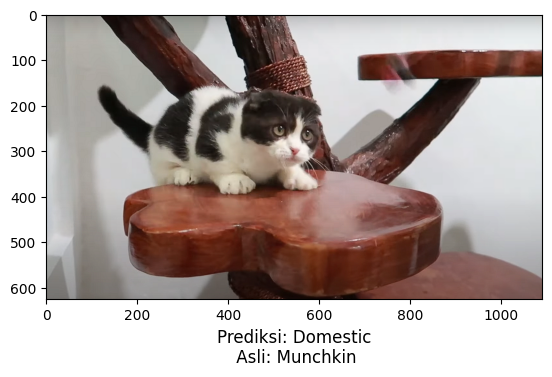

1/1 [==============================] - 0s 34ms/step


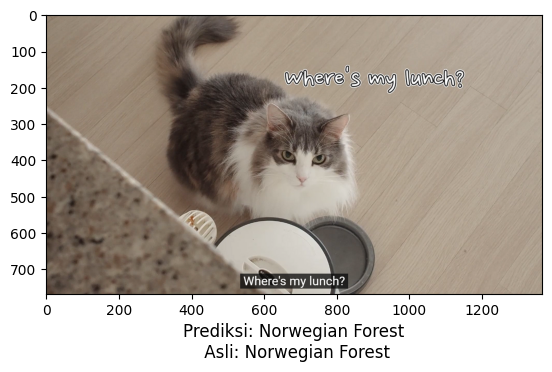

1/1 [==============================] - 0s 34ms/step


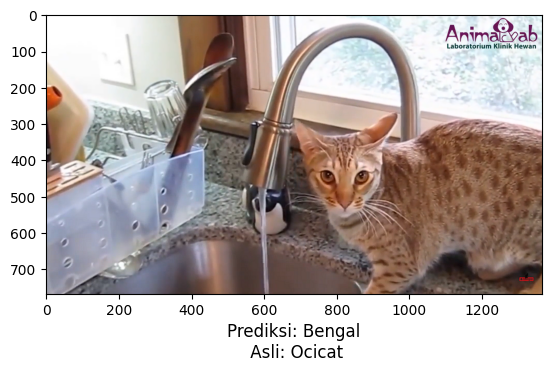

1/1 [==============================] - 0s 36ms/step


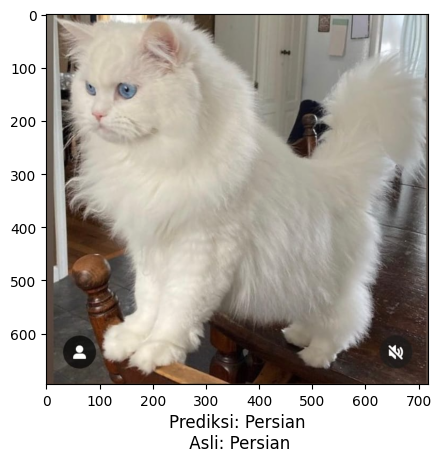

1/1 [==============================] - 0s 31ms/step


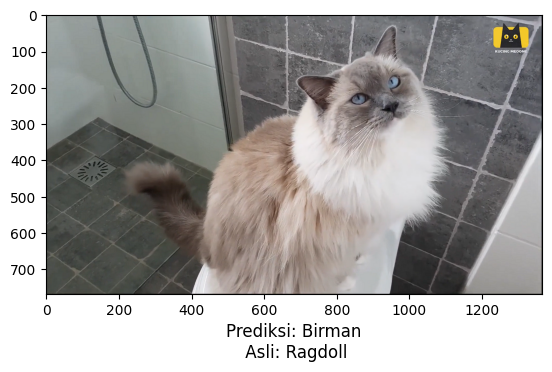

1/1 [==============================] - 0s 37ms/step


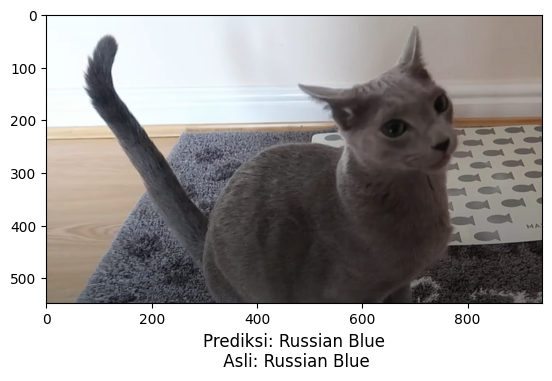

1/1 [==============================] - 0s 35ms/step


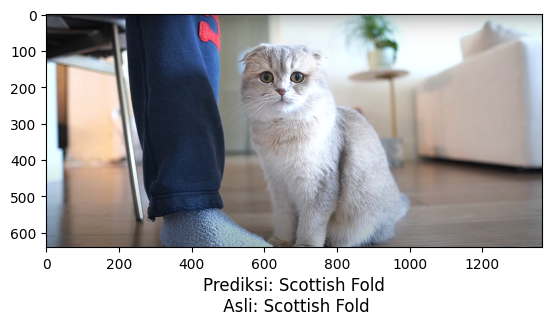

1/1 [==============================] - 0s 43ms/step


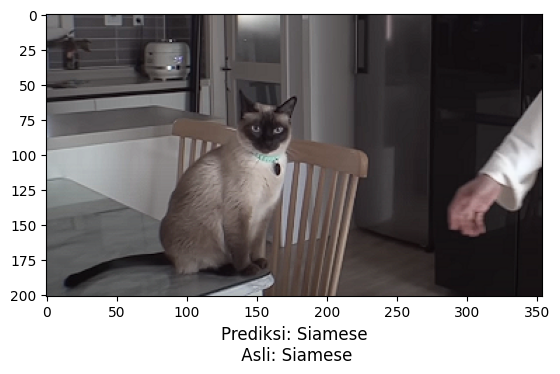

1/1 [==============================] - 0s 34ms/step


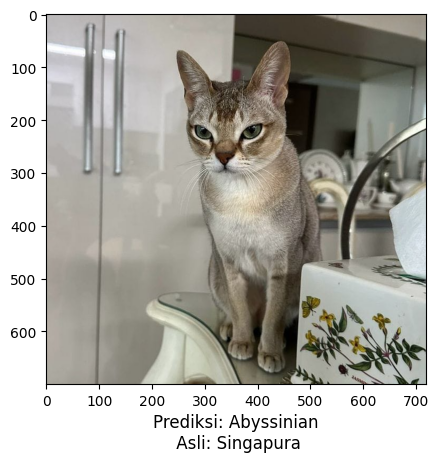

1/1 [==============================] - 0s 33ms/step


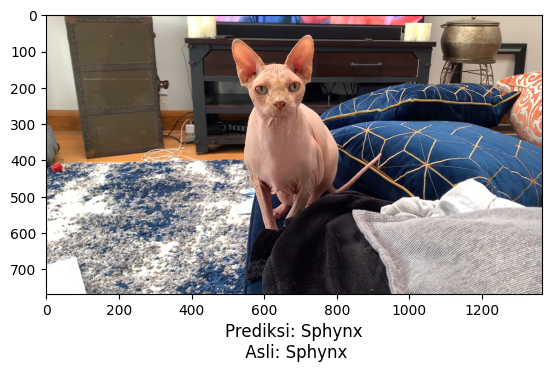

1/1 [==============================] - 0s 31ms/step


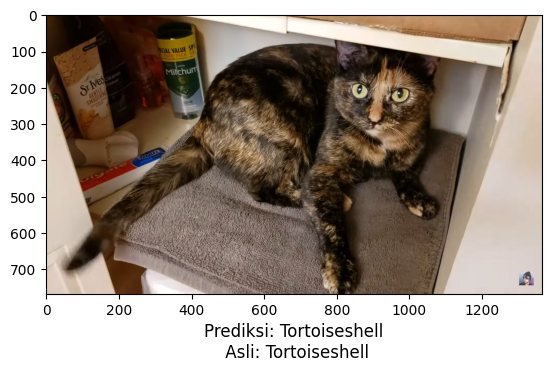

1/1 [==============================] - 0s 36ms/step


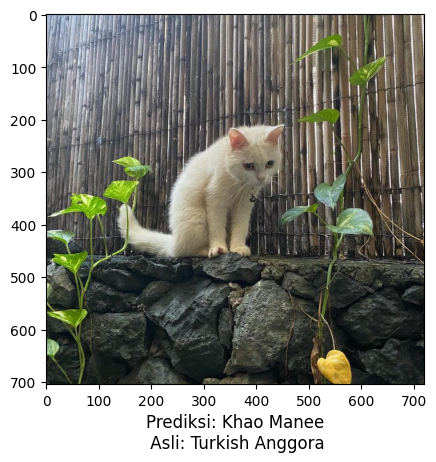

1/1 [==============================] - 0s 43ms/step


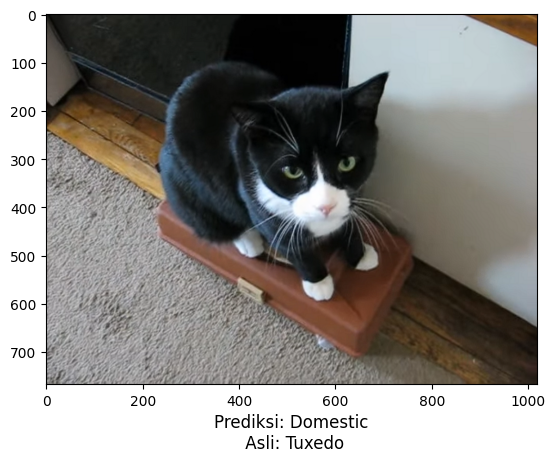


Jumlah tebakan benar : 16 (59.26%)
1. Abyssinian
2. American Shorthair
3. Bengal
4. Birman
5. Bombay
6. British Shorthair
7. Calico
8. Egyptian Mau
9. Khao Manee
10. Norwegian Forest
11. Persian
12. Russian Blue
13. Scottish Fold
14. Siamese
15. Sphynx
16. Tortoiseshell

Jumlah tebakan salah : 11 (40.74%)
1. Exotic Shorthair
2. Manx
3. Scottish Fold
4. Norwegian Forest
5. Domestic
6. Domestic
7. Bengal
8. Birman
9. Abyssinian
10. Khao Manee
11. Domestic


In [19]:
daftar_kelas = list(val.class_indices.keys())
daftar_file = os.listdir('Test')

kucing_benar = []
kucing_salah = []

for file in daftar_file:
    gambar = os.path.join('Test/', file)

    img = tf.keras.utils.load_img(gambar, target_size=ukuran_gambar)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    jenis = daftar_kelas[tf.argmax(score)]

    display = tf.keras.utils.load_img(gambar, target_size=None)
    plt.imshow(display)
    plt.xlabel(f'Prediksi: {jenis}\n Asli: {file[:-4]}', fontsize=12)
    plt.show()

    if jenis == file[:-4]:
        kucing_benar.append(jenis)
    else:
        kucing_salah.append(jenis)

total = len(kucing_benar) + len(kucing_salah)
persen_kucing_benar = round((len(kucing_benar)/total)*100, 2)
persen_kucing_salah = round((len(kucing_salah)/total)*100, 2)

print(f'\nJumlah tebakan benar : {len(kucing_benar)} ({persen_kucing_benar}%)')
for i, jenis_kucing in enumerate(kucing_benar):
    print(f'{i+1}. {jenis_kucing}')

print(f'\nJumlah tebakan salah : {len(kucing_salah)} ({persen_kucing_salah}%)')
for i, jenis_kucing in enumerate(kucing_salah):
    print(f'{i+1}. {jenis_kucing}')

In [20]:
# model.save('Models/' + datetime.now().strftime("%Y%m%d%H%M%S") + '.h5');